In [16]:
import os
from google.cloud import storage

from tempfile import TemporaryFile
import torch
from trainer.model import MusicNet

In [17]:
key_path = '../credentials/gs-access-key.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = key_path

In [20]:
# Download from gcloud
BUCKET = 'deep-musik-data'
JOB = 'trainer_20200612_182356'
client = storage.Client()
bucket = client.bucket(BUCKET)
blob = bucket.blob('train-output/{}/model.pt'.format(JOB))
# Load state_dict with pytorch
with TemporaryFile() as tmp:
    blob.download_to_file(tmp)
    tmp.seek(0)
    state_dict = torch.load(tmp)
# Create model with weights 
model = MusicNet()
model.load_state_dict(state_dict)
model

MusicNet(
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv1d(1, 16, kernel_size=(5,), stride=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,))
  (fc1): Linear(in_features=3712, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

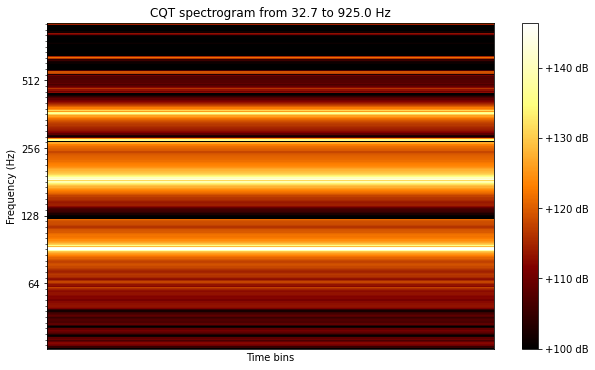

/home/julian/projects/deep-music/.venv/lib/python3.8/site-packages/librosa/core/constantq.py:673: UserWarning: hop_length=44800 exceeds minimum CQT filter length=174.274.
This will probably cause unpleasant acoustic artifacts. Consider decreasing your hop length or increasing the frequency resolution of your CQT.
  warnings.warn('hop_length={} exceeds minimum CQT filter length={:.3f}.\n'


In [41]:
from pathlib import Path
import numpy as np

DATA_DIR = Path('../data/processed/time_intervals=1/resolution=5/')
file = 'keyboard_acoustic_000-042-100.spec'
instr_name = '_'.join(file.split('_')[:-1])
instr_id = file.split('-')[0]

spec = np.load(DATA_DIR/instr_name/instr_id/file, allow_pickle=True)
spec.plot(db_thresh=100)
spec.to_audio().play()

In [44]:
from trainer.dataset import ToTensor, Normalise

TypeError: conv1d(): argument 'input' (position 1) must be Tensor, not Spectrogram